### Importing libraries and dataset:

In [1]:
# installing packages in Ucloud:
!pip install pandas numpy matplotlib scikit-learn tensorflow keras-tuner scipy seaborn scipy

In [2]:
# Importing every library used in our project:

# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and utilities
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.pipeline import Pipeline


# Neural Network and hyperparameter tuning
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

# Utility functions
import time
from scipy.stats import randint

In [3]:
# Storing the data of our CSV into a pandas DataFrame:

file_path = "2022_lar.txt"
df = pd.read_csv(file_path, sep="|", low_memory=False)
# sep="|" -> as the file delimiter is a "|"" character.
# low_memory=False -> in order to disable memory optimization, and original keep data types

# Number of rows of our data:
print(f"Number of rows in our dataset: {len(df)}")

Number of rows in our dataset: 16099637


### Initial Data Cleaning:

In [4]:
# Describing our dataset by feature:
df.describe()

,activity_year,derived_msa_md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,16099637.0,1.609964e+07,1.566173e+07,1.560564e+07,1.609964e+07,1.609964e+07,1.609964e+07,1.609964e+07,1.609964e+07,1.609964e+07,...,520224.000000,85183.000000,7687.000000,1.609964e+07,1.609964e+07,1.609964e+07,1.609964e+07,1.609964e+07,1.609964e+07,1.609964e+07
mean,2022.0,3.981855e+04,2.769424e+04,2.768624e+10,2.514607e+00,4.859883e+00,1.970352e+00,1.297242e+00,1.145510e+01,1.167532e+00,...,4.516935,5.646291,6.580330,4.714329e+03,3.635827e+01,9.046365e+04,1.078292e+02,1.197408e+03,1.612524e+03,3.493491e+01
std,0.0,2.621820e+04,1.648177e+04,1.647945e+10,1.831988e+00,1.612169e+01,1.696129e-01,6.351261e-01,1.417452e+01,3.734499e-01,...,2.792572,2.499524,2.482626,2.240654e+03,2.608572e+01,2.502489e+04,4.491760e+01,5.997842e+02,7.229771e+02,1.880231e+01
min,2022.0,1.018000e+04,1.001000e+03,1.001020e+09,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2022.0,2.134000e+04,1.209500e+04,1.209502e+10,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,3.000000,4.000000,5.000000,3.370000e+03,1.549000e+01,7.960000e+04,8.212000e+01,7.970000e+02,1.168000e+03,2.100000e+01
50%,2022.0,3.500400e+04,2.701900e+04,2.701909e+10,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,...,4.000000,5.000000,6.000000,4.514000e+03,2.936000e+01,9.040000e+04,1.043800e+02,1.156000e+03,1.587000e+03,3.500000e+01
75%,2022.0,4.264400e+04,4.207100e+04,4.206911e+10,4.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,3.100000e+01,1.000000e+00,...,7.000000,9.000000,9.000000,5.842000e+03,5.289000e+01,1.018000e+05,1.305000e+02,1.551000e+03,2.033000e+03,4.800000e+01
max,2022.0,9.999900e+04,7.803000e+04,7.803096e+10,8.000000e+00,7.200000e+01,2.000000e+00,4.000000e+00,3.200000e+01,2.000000e+00,...,9.000000,9.000000,9.000000,3.789200e+04,1.000000e+02,1.683000e+05,5.162000e+02,6.276000e+03,8.233000e+03,8.000000e+01


In [5]:
# Displaying features and their respective data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16099637 entries, 0 to 16099636
Data columns (total 99 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   activity_year                             int64  
 1   lei                                       object 
 2   derived_msa_md                            int64  
 3   state_code                                object 
 4   county_code                               float64
 5   census_tract                              float64
 6   conforming_loan_limit                     object 
 7   derived_loan_product_type                 object 
 8   derived_dwelling_category                 object 
 9   derived_ethnicity                         object 
 10  derived_race                              object 
 11  derived_sex                               object 
 12  action_taken                              int64  
 13  purchaser_type                            int64  
 14  

In [ ]:
# Displaying amount of rows and features:
print(f"Listings has {df.shape[0]} rows & {df.shape[1]} columns")

Listings has 16099637 rows & 99 columns


In [7]:
# Creating a function that displays the amount of missing values in a dataset by column, and its respective percentage over total rows:


def missing_values(DataFrame):
    total_missing = DataFrame.isnull().sum()  # amount of total missing values
    percentage_missing = (
        DataFrame.isnull().sum() / len(DataFrame)
    ) * 100  # percentage of total missing values

    print("Missing Value Analysis:")
    for column in DataFrame.columns:
        count = total_missing[column]  # amount of missing values per column
        percentage = percentage_missing[
            column
        ]  # percentage of missing values per column
        print(f"{column}: {count} ({percentage:.2f}%)")  # printing the results


# Calling the function to our dataset:
missing_values(df)

Missing Value Analysis:
activity_year: 0 (0.00%)
lei: 0 (0.00%)
derived_msa_md: 0 (0.00%)
state_code: 187412 (1.16%)
county_code: 437906 (2.72%)
census_tract: 493993 (3.07%)
conforming_loan_limit: 72385 (0.45%)
derived_loan_product_type: 0 (0.00%)
derived_dwelling_category: 0 (0.00%)
derived_ethnicity: 0 (0.00%)
derived_race: 0 (0.00%)
derived_sex: 0 (0.00%)
action_taken: 0 (0.00%)
purchaser_type: 0 (0.00%)
preapproval: 0 (0.00%)
loan_type: 0 (0.00%)
loan_purpose: 0 (0.00%)
lien_status: 0 (0.00%)
reverse_mortgage: 0 (0.00%)
open_end_line_of_credit: 0 (0.00%)
business_or_commercial_purpose: 0 (0.00%)
loan_amount: 0 (0.00%)
combined_loan_to_value_ratio: 5307881 (32.97%)
interest_rate: 5576996 (34.64%)
rate_spread: 7925579 (49.23%)
hoepa_status: 0 (0.00%)
total_loan_costs: 8287736 (51.48%)
total_points_and_fees: 15689738 (97.45%)
origination_charges: 8215889 (51.03%)
discount_points: 11744430 (72.95%)
lender_credits: 13154360 (81.71%)
loan_term: 270551 (1.68%)
prepayment_penalty_term: 151

In [8]:
# List of features that are not considered for our models:
features_to_drop = [
    "activity_year",
    "lei",
    "interest_rate",
    "rate_spread",
    "total_loan_costs",
    "total_points_and_fees",
    "origination_charges",
    "discount_points",
    "lender_credits",
    "prepayment_penalty_term",
    "intro_rate_period",
    "multifamily_affordable_units",
    "applicant_ethnicity_2",
    "applicant_ethnicity_3",
    "applicant_ethnicity_4",
    "applicant_ethnicity_5",
    "co_applicant_ethnicity_2",
    "co_applicant_ethnicity_3",
    "co_applicant_ethnicity_4",
    "co_applicant_ethnicity_5",
    "applicant_race_2",
    "applicant_race_3",
    "applicant_race_4",
    "applicant_race_5",
    "co_applicant_race_2",
    "co_applicant_race_3",
    "co_applicant_race_4",
    "co_applicant_race_5",
    "applicant_age_above_62",
    "co_applicant_age_above_62",
    "aus_2",
    "aus_3",
    "aus_4",
    "aus_5",
    "denial_reason_2",
    "denial_reason_3",
    "denial_reason_4",
    "county_code",
    "census_tract",
    "derived_msa_md",
    "action_taken",
    "reverse_mortgage",
]

# Dropping the above features:
df_dropped = df.drop(columns=features_to_drop)

In [9]:
# List of features to which remove missing values:
columns_remove_missing = [
    "state_code",
    "conforming_loan_limit",
    "combined_loan_to_value_ratio",
    "property_value",
    "loan_term",
    "income",
    "debt_to_income_ratio",
    "applicant_ethnicity_1",
    "co_applicant_ethnicity_1",
    "applicant_race_1",
    "co_applicant_race_1",
]

# Dropping lines with missing values from the above features:
df_new = df_dropped.dropna(subset=columns_remove_missing)

### Feature Transformation:

In [10]:
# Dropping lines labeled as "1111" (mapped as 'exempt') and storing them in a new dataset:
df_new = df_new[~(df_new == 1111).any(axis=1)]

In [11]:
# Checking for remaining columns:
df_new.columns

Index(['derived_msa_md', 'state_code', 'county_code', 'census_tract',
       'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open_end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'combined_loan_to_value_ratio', 'hoepa_status',
       'loan_term', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'other_nonamortizing_features', 'property_value',
       'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co_applicant_credit_score_type', 'applicant_ethnicity_1',
       'co_applicant_ethnicity_1', 'applicant_ethnicity_observed',
 

In [14]:
# List of every feature that should be categorical:
categorical_features = [
    "purchaser_type",
    "preapproval",
    "loan_type",
    "loan_purpose",
    "lien_status",
    "open_end_line_of_credit",
    "business_or_commercial_purpose",
    "hoepa_status",
    "negative_amortization",
    "state_code",
    "conforming_loan_limit",
    "derived_loan_product_type",
    "derived_dwelling_category",
    "derived_ethnicity",
    "derived_race",
    "co_applicant_age",
    "applicant_sex_observed",
    "co_applicant_race_observed",
    "manufactured_home_land_property_interest",
    "submission_of_application",
    "co_applicant_sex",
    "applicant_sex",
    "co_applicant_sex_observed",
    "aus_1",
    "initially_payable_to_institution",
    "co_applicant_ethnicity_1",
    "derived_sex",
    "debt_to_income_ratio",
    "applicant_age",
    "interest_only_payment",
    "balloon_payment",
    "other_nonamortizing_features",
    "construction_method",
    "occupancy_type",
    "manufactured_home_secured_property_type",
    "manufactured_home_land_property_interest",
    "total_units",
    "applicant_credit_score_type",
    "co_applicant_credit_score_type",
    "applicant_ethnicity_observed",
    "co_applicant_ethnicity_observed",
    "applicant_race_observed",
    "applicant_ethnicity_1",
    "applicant_race_1",
    "co_applicant_race_1",
]

# Converting the data types of above features to categorical:
for feature in categorical_features:
    df_new[feature] = df_new[feature].astype(str)
    df_new[feature] = df_new[feature].astype("category")

In [13]:
# Additional numerical transformations:

# Converting the "property_value" to numeric, and removing its "Exempt" values:
df_new["property_value"] = pd.to_numeric(
    df_new["property_value"], errors="coerce"
).astype("Int64")
df_new.dropna(subset=["property_value"], inplace=True)

# Removing negative values from "tract_median_age_of_housing_units":
df_new = df_new[df_new["tract_median_age_of_housing_units"] >= 0]

In [15]:
# List of every feature that should be integers:
int_features = ["tract_population"]

# Converting the data type of the above feature to int:
for feature in int_features:
    df_new[feature] = df_new[feature].astype("int32")

# List of every feature that should be floats:
float_features = [
    "tract_to_msa_income_percentage",
    "tract_minority_population_percent",
    "ffiec_msa_md_median_family_income",
    "tract_minority_population_percent",
    "income",
    "loan_amount",
    "tract_owner_occupied_units",
    "tract_one_to_four_family_homes",
    "tract_median_age_of_housing_units",
    "loan_term",
    "property_value",
    "combined_loan_to_value_ratio",
]

# Converting the data types of the above features to floats:
for feature in float_features:
    df_new[feature] = df_new[feature].astype("float32")

In [16]:
# Storing a list of the numerical features:
numerical_features = int_features + float_features

In [17]:
# Length of the cleaned dataset:
len(df_new)

9662486

In [18]:
# Defining the function that will transform the target feature to a binary classification:
def map_integers(n):
    if 1 <= n <= 9:  # Accounting for declined loans
        return 0
    elif n >= 10:  # Accounting for approved loans
        return 1


# Applying the mapping function to the 'numbers' column
df_new["denial_reason_1"] = df_new["denial_reason_1"].apply(map_integers)

In [19]:
# List of our top 25 features after performing feature selection:
top_25_features = [
    "hoepa_status",
    "purchaser_type",
    "debt_to_income_ratio",
    "initially_payable_to_institution",
    "occupancy_type",
    "income",
    "combined_loan_to_value_ratio",
    "loan_purpose",
    "aus_1",
    "tract_minority_population_percent",
    "loan_amount",
    "property_value",
    "tract_to_msa_income_percentage",
    "tract_population",
    "tract_one_to_four_family_homes",
    "tract_owner_occupied_units",
    "ffiec_msa_md_median_family_income",
    "tract_median_age_of_housing_units",
    "state_code",
    "derived_loan_product_type",
    "applicant_credit_score_type",
    "loan_term",
    "applicant_age",
    "business_or_commercial_purpose",
    "loan_type",
    "denial_reason_1",  # target
]

# Filtering our DataFrame to only contain the top 25 features:
df_new = df_new[top_25_features]

### Label Encoding:

In [20]:
# Storing a new DataFrame with the label encoded features:
df_label_encoded = df_new.copy()

In [23]:
# List of the categorical features in our top 25:
top_25_categorical_features = [
    "hoepa_status",
    "purchaser_type",
    "debt_to_income_ratio",
    "initially_payable_to_institution",
    "occupancy_type",
    "loan_purpose",
    "aus_1",
    "state_code",
    "derived_loan_product_type",
    "applicant_credit_score_type",
    "applicant_age",
    "business_or_commercial_purpose",
    "loan_type",
]

# Label encoding each of the above categorical features:

label_encoders = {}  # initializing dictionary to store label encoders
# Loop that iterates over the features, encoding them. It assigns them back to the new Dataframe and stores their label encoders in the dictionary:
for col in top_25_categorical_features:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le

### Hyperparameter Tuning
##### Train-Test Split:

In [25]:
# Using 30% of the cleaned dataset:
df_sample_label_encoding = df_label_encoded.sample(frac=0.3, random_state=42)

# Performing a train-test split on the above sample of our dataset:
X_train, X_test, y_train, y_test = train_test_split(
    df_sample_label_encoding.drop(
        columns=["denial_reason_1"]
    ),  # Binary outcome variable
    df_sample_label_encoding["denial_reason_1"],
    test_size=0.2,  # 20% of the data will be used for testing | 80% for training
    random_state=42,
)

##### Random Forest

In [ ]:
# Random Forest hyperparameter tuning using Randomized Search:

# Parameter Grid for evaluating the hyperparameters:
param_dist = {
    "n_estimators": randint(100, 1000),
    "max_depth": [None] + list(range(10, 110, 10)),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 5),
    "criterion": ["gini", "entropy"],
    "class_weight": ["balanced", None],
}

#  Randomized Search for Random Forest hyperparameter tuning:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=2,
)

# Fitting the Randomized Search with the training data:
random_search.fit(X_train, y_train)

# Getting the resulting best hyperparameters:
best_random_params = random_search.best_params_
print("Best Hyperparameters:", best_random_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 650}


In [ ]:
# Random Forest model with the best hyperparameters:
best_rf_model = random_search.best_estimator_


# Function to ease the evaluation of the model:
def model_evaluation(model, X=X_test, Y=y_test):
    # Model Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} Accuracy:", accuracy)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return y_pred


# Evaluating the Random Forest model:
model_evaluation(best_rf_model)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_split=6,
                       n_estimators=650, random_state=42) Accuracy: 0.9599196165348152
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     35898
           1       0.99      0.96      0.97    152698

    accuracy                           0.96    188596
   macro avg       0.92      0.96      0.94    188596
weighted avg       0.96      0.96      0.96    188596

Confusion Matrix:
[[ 34466   1432]
 [  6127 146571]]


array([1, 1, 1, ..., 1, 0, 0])

##### Logistic Regression

In [ ]:
# Defining the parameter grid for L2 (Ridge) hyperparameter tuning
ridge_param_grid = {
    "logistic__C": [0.001, 0.01, 0.1, 1, 10],  # Regularization strength values
    "logistic__penalty": ["l2"],  # Regularization penalty (L2 norm)
    "logistic__solver": [
        "saga"
    ],  # Solver algorithm for model training (Stochastic Average Gradient Augmented)
}
# Note the "logistic__" prefix --> this is used to specify parameters within a pipeline

# Defining the pipeline for Ridge Logistic Regression:
ridge_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Standardizing the features
        ("logistic", LogisticRegression(max_iter=20000)),
    ]  # Logistic Regression model
)

# Performing Grid Search to find the best hyperparameters:
ridge_grid_search = GridSearchCV(
    ridge_pipeline,  # Above pipeline that will be tuned
    ridge_param_grid,  # Above parameter grid to search over
    cv=3,  # 3-fold cross-validation
    scoring="accuracy",  # Accuracy as our scoring metric
    n_jobs=-1,  # In order to utilize all available CPU cores for parallelization
)

# Fitting the grid search with the training data:
ridge_grid_search.fit(X_train, y_train)

# Best estimator from the grid search:
best_ridge = ridge_grid_search.best_estimator_

# Making predictions using the best estimator:
y_pred_ridge = best_ridge.predict(X_test)

# Printing Results:
print("Ridge Logistic Regression Classification Report:")
print(
    f"Best parameters: {ridge_grid_search.best_params_}"
)  # Print the best hyperparameters
print(
    f"Best score: {ridge_grid_search.best_score_}"
)  # Print the best cross-validation score
print(classification_report(y_test, y_pred_ridge))  # Print the classification report

Ridge Logistic Regression Classification Report:
Best parameters: {'logistic__C': 1, 'logistic__penalty': 'l2', 'logistic__solver': 'saga'}
Best score: 0.9550256330588783
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3755
           1       0.99      0.95      0.97     15557

    accuracy                           0.95     19312
   macro avg       0.91      0.96      0.93     19312
weighted avg       0.96      0.95      0.96     19312



In [ ]:
# Define the parameter grid for L1 (Lasso) hyperparameter tuning
lasso_param_grid = {
    "logistic__C": [0.01, 0.1, 1, 10, 100],  # Regularization strength values
    "logistic__penalty": ["l1"],  # Regularization penalty (L1 norm)
    "logistic__solver": ["liblinear"],  # Solver algorithm for optimization
}
# Note the "logistic__" prefix --> this is used to specify parameters within a pipeline

# Defining the pipeline for Lasso Logistic Regression:
lasso_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Standardize features
        ("logistic", LogisticRegression(max_iter=20000)),
    ]  # Logistic Regression model
)

# Performing Grid Search to find the best hyperparameters:
lasso_grid_search = GridSearchCV(
    lasso_pipeline,  # Above pipeline that will be tuned
    lasso_param_grid,  # Above parameter grid to search over
    cv=3,  # 3-fold cross-validation
    scoring="accuracy",  # Accuracy as our scoring metric
    n_jobs=-1,  # Use all available CPU cores for parallelization
)

# Fitting the grid search with the training data:
lasso_grid_search.fit(X_train, y_train)

# Best estimator from the grid search:
best_lasso = lasso_grid_search.best_estimator_

# Making predictions using the best estimator:
y_pred_lasso = best_lasso.predict(X_test)

# Printing Results:
print(f"Best parameters for Lasso: {lasso_grid_search.best_params_}")
print(f"Best score for Lasso: {lasso_grid_search.best_score_}")
print("Lasso Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lasso))

Best parameters for Lasso: {'logistic__C': 10, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Best score for Lasso: 0.9552327688881984
Lasso Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3755
           1       0.99      0.95      0.97     15557

    accuracy                           0.95     19312
   macro avg       0.91      0.96      0.93     19312
weighted avg       0.96      0.95      0.95     19312



##### Logistic Regression with dummy variables:

In [26]:
# Repeating the exact same process as before, but with dummy variables for our categorical features:

# Creating dummy variables for the categorical features from the top 25:
# Note: drop_first=True is used to avoid multicollinearity
df_dummies = pd.get_dummies(
    df_new, columns=top_25_categorical_features, drop_first=True
)

# Using 30% of the data:
df_sample_dummies = df_dummies.sample(frac=0.3, random_state=42)

# Performing a train-test split on the above sample of our dataset:
X_train, X_test, y_train, y_test = train_test_split(
    df_sample_dummies.drop(columns=["denial_reason_1"]),  # Binary outcome variable
    df_sample_dummies["denial_reason_1"],
    test_size=0.2,  # 20% of the data will be used for testing | 80% for training
    random_state=42,
)

In [ ]:
# Grid Search for L2 (Ridge) Logistic Regression hyperparameter tuning:
# Note: exactly the same process as before, but with the dummy variables

ridge_param_grid = {
    "logistic__C": [0.001, 0.01, 0.1, 1],
    "logistic__penalty": ["l2"],
    "logistic__solver": ["saga"],
}

ridge_pipeline = Pipeline(
    [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=1000))]
)

ridge_grid_search = GridSearchCV(
    ridge_pipeline,
    ridge_param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)

ridge_grid_search.fit(X_train, y_train)

best_ridge = ridge_grid_search.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)

# Printing Results:
print("Ridge Logistic Regression Classification Report:")
print(f"Best parameters: {ridge_grid_search.best_params_}")
print(f"Best score: {ridge_grid_search.best_score_}")
print(classification_report(y_test, y_pred_ridge))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge Logistic Regression Classification Report:
Best parameters: {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'saga'}
Best score: 0.9567451964279704
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     18734
           1       0.99      0.96      0.97     77822

    accuracy                           0.96     96556
   macro avg       0.92      0.95      0.93     96556
weighted avg       0.96      0.96      0.96     96556



In [ ]:
# Grid Search for L1 (Lasso) Logistic Regression hyperparameter tuning:
# Note: exactly the same process as before, but with the dummy variables

lasso_pipeline = Pipeline(
    [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=20000))]
)

lasso_param_grid = {
    "logistic__C": [0.01, 0.1, 1, 10],  # Note the "logistic__" prefix
    "logistic__penalty": ["l1"],  # Note the "logistic__" prefix
    "logistic__solver": ["liblinear"],  # Note the "logistic__" prefix
}

lasso_grid_search = GridSearchCV(
    lasso_pipeline,
    lasso_param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)

lasso_grid_search.fit(X_train, y_train)

best_lasso = lasso_grid_search.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)

# Printing Results:
print(f"Best parameters for Lasso: {lasso_grid_search.best_params_}")
print(f"Best score for Lasso: {lasso_grid_search.best_score_}")
print("Lasso Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lasso))

Best parameters for Lasso: {'logistic__C': 1, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Best score for Lasso: 0.9568176934051053
Lasso Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     18734
           1       0.99      0.96      0.97     77822

    accuracy                           0.96     96556
   macro avg       0.92      0.95      0.93     96556
weighted avg       0.96      0.96      0.96     96556



##### Neural Network

In [ ]:
def build_model_tuner(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(shape=[X_train.shape[1]]))
    model.add(keras.layers.BatchNormalization())  # Batch normalization layer

    for i in range(hp.Int("num_layers", 2, 5)):  # Number of hidden layers
        model.add(
            keras.layers.Dense(  # Dense layer with hyperparameters for number of units
                units=hp.Int("units_" + str(i), min_value=32, max_value=256, step=32),
                activation="relu",
            )
        )
        model.add(  # Dropout layer with hyperparameters for dropout rate
            keras.layers.Dropout(
                rate=hp.Float("dropout_" + str(i), min_value=0, max_value=0.5, step=0.1)
            )
        )

    model.add(keras.layers.Dense(1, activation="sigmoid"))  # Output layer

    model.compile(
        optimizer=keras.optimizers.Adm(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])  # Learning rate
        ),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    return model


tuner = RandomSearch(
    build_model_tuner,
    objective="val_accuracy",
    max_trials=50,
    executions_per_trial=3,
    directory="final_project_ml",
    project_name="random_search_regularization",
)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# Hyperparameter search
tuner.search(
    X_train, y_test, epochs=5, validation_split=0.2, callbacks=[early_stopping]
)

# Optimal hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hyperparameters)

### Best Models:

##### Preparation:

In [28]:
# Setting a random seed for reproducibility:
np.random.seed(42)

# Randomly selecting 50% of the row indices from the dataframe:
row_indices = np.random.choice(df_new.index, size=int(len(df_new) * 0.5), replace=False)

# Splitting the dataset based on the selected row indices:
df_train = df_new.loc[row_indices]
df_test = df_new.drop(row_indices)

# Separating features and target variable:
X_train = df_train.drop(columns=["denial_reason_1"])
y_train = df_train["denial_reason_1"]
X_test = df_test.drop(columns=["denial_reason_1"])
y_test = df_test["denial_reason_1"]

# Applying necessary encoding:
df_train_ordinal = X_train.copy()
df_test_ordinal = X_test.copy()
label_encoders = {}
for col in top_25_categorical_features:
    le = LabelEncoder()
    df_train_ordinal[col] = le.fit_transform(df_train_ordinal[col])
    df_test_ordinal[col] = le.transform(df_test_ordinal[col])
    label_encoders[col] = le

# Apply necessary one-hot encoding:
df_train_one_hot = pd.get_dummies(
    X_train, columns=top_25_categorical_features, drop_first=True
)
df_test_one_hot = pd.get_dummies(
    X_test, columns=top_25_categorical_features, drop_first=True
)
# Ensuring both train and test sets have the same columns after one-hot encoding:
df_train_one_hot, df_test_one_hot = df_train_one_hot.align(
    df_test_one_hot, join="left", axis=1, fill_value=0
)

##### Logistic Regression:

In [9]:
start_time = time.time()  # in order to measure the training time

# Pipeline that standarithes the data and applies a L1 (Lasso) Logistic Regression model:
lasso_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        (
            "logistic",
            LogisticRegression(
                max_iter=1000, C=1, penalty="l1", solver="saga", n_jobs=-1
            ),
        ),
    ]
)

# Fitting the pipeline on the training data:
lasso_pipeline.fit(df_train_one_hot, y_train)

# Printing the time taken to train the model:
print(f"Training time: {time.time() - start_time}")

Training time: 11207.27603816986
Accuracy: 0.9563704413129293


In [ ]:
# Evaluating the accuracy of the model on the test data:
accuracy = lasso_pipeline.score(df_test_one_hot, y_test)
print(f"Accuracy: {accuracy}")

# Printing the classification report:
print(classification_report(y_test, lasso_pipeline.predict(X_test)))

Accuracy: 0.9563704413129293


In [41]:
# Function to get the scores of each model:
def get_scores(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average="binary")
    recall = recall_score(y_true, y_pred, average="binary")
    f1 = f1_score(y_true, y_pred, average="binary")
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")


# Printing the scores of our best Logistic Regression model:
print("Logistic Regression Metrics")
lasso_pred = lasso_pipeline.predict(df_test_one_hot)
get_scores(y_test, lasso_pred)

Logistic Regression Metrics
Accuracy: 0.9563704413129293
Precision: 0.9881316704974846
Recall: 0.9573282147304947
F1 Score: 0.9724860792235406


##### Random Forest:

In [7]:
# Record the start time for training
start_time = time.time()

# Random Forest model with the best hyperparameters:
rf = RandomForestClassifier(
    n_estimators=1000,
    criterion="entropy",
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=6,
    random_state=42,
    n_jobs=-1,
)

# Fitting the model on the training data:
rf.fit(df_train_ordinal, y_train)

# Record the end time for training
end_time = time.time()
# Calculate the total time taken to train the model
runtime = end_time - start_time

# Model timing:
print(f"Training time: {runtime:.2f} seconds")

Training time: 321.99 seconds


In [33]:
# Making predictions on the test data:
predictions_rf = rf.predict(df_test_ordinal)

# Printing the accuracy of the model:
print(f"Accuracy: {accuracy_score(y_test,predictions_rf)}")

Accuracy: 0.9614488445313142


In [40]:
# Printing the scores of our best Random Forest model:
print("Random Forest Metrics")
get_scores(y_test, predictions_rf)

Random Forest Metrics
Accuracy: 0.9614488445313142
Precision: 0.9901307521223606
Recall: 0.9617212424245072
F1 Score: 0.9757192448548265


##### Neural Network:

In [47]:
# Saving our variables and predictions to CSV files:

df_train_one_hot.to_csv("df_train_one_hot.csv")
df_train_ordinal.to_csv("df_train_ordinal.csv")
df_test_ordinal.to_csv("df_test_ordinal.csv")
df_test_one_hot.to_csv("df_test_one_hot.csv")

y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

predictions_rf = rf.predict_proba(df_test_ordinal)
predictions_log_reg = lasso_pipeline.predict_proba(df_test_one_hot)
pd.DataFrame(predictions_rf).to_csv("predictions_rf.csv", index=False)
pd.DataFrame(predictions_log_reg).to_csv("predictions_log_reg.csv", index=False)

In [1]:
# Defining the hyperparameters for the neural network:
hyperparameters = {
    "num_layers": 4,  # Number of hidden layers
    "units_0": 192,  # Number of units in the first hidden layer
    "dropout_0": 0.4,  # Dropout rate for the first hidden layer
    "units_1": 32,  # Number of units in the second hidden layer
    "dropout_1": 0.1,  # Dropout rate for the second hidden layer
    "learning_rate": 0.0001,  # Learning rate for the optimizer
    "units_2": 64,  # Number of units in the third hidden layer
    "dropout_2": 0.1,  # Dropout rate for the third hidden layer
    "units_3": 224,  # Number of units in the fourth hidden layer
    "dropout_3": 0.1,  # Dropout rate for the fourth hidden layer
}

# Defining the input shape based on the number of features in the training data:
input_shape = df_train_one_hot.shape[1]  # Adjust this according to your dataset


# Defining the function that will build the neural network model using the hyperparameters specified above:
def build_model(hyperparameters):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[input_shape]))  # input layer
    model.add(keras.layers.BatchNormalization())  # batch normalization layer

    # Adding hidden layers with above specified units and dropout rates
    for i in range(hyperparameters["num_layers"]):
        model.add(
            keras.layers.Dense(
                units=hyperparameters[f"units_{i}"],
                activation="relu",
            )
        )
        model.add(keras.layers.Dropout(rate=hyperparameters[f"dropout_{i}"]))

    model.add(
        keras.layers.Dense(1, activation="sigmoid")
    )  # output layer with sigmoid activation function

    # Compiling the model with Adam optimizer, and binary cross-entropy loss:
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hyperparameters["learning_rate"]),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    return model


# Building the model:
model = build_model(hyperparameters)

# Printing model summary:
model.summary()

# Defining the EarlyStopping callback to stop training when validation loss stops improving:
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

# Recording the start time for training:
start_time = time.time()

# Training the model with early stopping:
history = model.fit(
    df_train_one_hot.astype("float32"),
    y_train,
    epochs=30,
    callbacks=[early_stopping],
    validation_data=(df_test_one_hot.astype("float32"), y_test),
)

# Recording the end time after training ends:
end_time = time.time()

# Calculating the total runtime for training the model:
runtime = end_time - start_time
print(f"Training time: {runtime:.2f} seconds")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 136)            │           544 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │        26,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 224)            │        14,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,921 (195.00 KB)

 Trainable params: 49,649 (193.94 KB)

 Non-trainable params: 272 (1.06 KB)

Epoch 1/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 655s 4ms/step - accuracy: 0.9504 - loss: 0.1124 - val_accuracy: 0.9583 - val_loss: 0.1373
Epoch 2/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 639s 4ms/step - accuracy: 0.9582 - loss: 0.0935 - val_accuracy: 0.9585 - val_loss: 0.1136
Epoch 3/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 635s 4ms/step - accuracy: 0.9589 - loss: 0.0922 - val_accuracy: 0.9590 - val_loss: 0.1378
Epoch 4/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 637s 4ms/step - accuracy: 0.9590 - loss: 0.0917 - val_accuracy: 0.9589 - val_loss: 0.1200
Epoch 5/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 635s 4ms/step - accuracy: 0.9591 - loss: 0.0917 - val_accuracy: 0.9591 - val_loss: 0.1101
Epoch 6/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 640s 4ms/step - accuracy: 0.9592 - loss: 0.0913 - val_accuracy: 0.9590 - val_loss: 0.1109
Epoch 7/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 634s 4ms/step - accuracy: 0.9593 - loss: 0.0912 - val_accuracy: 0.9578 - val_loss: 0.1035
Epoch 8/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 64

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



150977/150977 ━━━━━━━━━━━━━━━━━━━━ 634s 4ms/step - accuracy: 0.9595 - loss: 0.0909 - val_accuracy: 0.9591 - val_loss: 0.1049
Epoch 13/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 630s 4ms/step - accuracy: 0.9595 - loss: 0.0912 - val_accuracy: 0.9594 - val_loss: 0.1041
Epoch 14/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 648s 4ms/step - accuracy: 0.9595 - loss: 0.0910 - val_accuracy: 0.9592 - val_loss: 0.0976
Epoch 15/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 626s 4ms/step - accuracy: 0.9594 - loss: 0.0912 - val_accuracy: 0.9588 - val_loss: 0.1008
Epoch 16/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 624s 4ms/step - accuracy: 0.9593 - loss: 0.0909 - val_accuracy: 0.9586 - val_loss: 0.1032
Epoch 17/30
150977/150977 ━━━━━━━━━━━━━━━━━━━━ 636s 4ms/step - accuracy: 0.9595 - loss: 0.0909 - val_accuracy: 0.9591 - val_loss: 0.1048
Epoch 18/30
 46893/150977 ━━━━━━━━━━━━━━━━━━━━ 5:42 3ms/step - accuracy: 0.9598 - loss: 0.0905

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [4]:
# Make predictions on the test data
results = model.predict(df_test_one_hot.astype("float32"))

150977/150977 ━━━━━━━━━━━━━━━━━━━━ 125s 828us/step


In [28]:
# Evaluate the trained model on the test data (provides accuracy and loss of the test data)
model.evaluate(df_test_one_hot.astype("float32"), y_test)

150977/150977 ━━━━━━━━━━━━━━━━━━━━ 151s 999us/step - accuracy: 0.9505 - loss: 0.1177


[0.10827310383319855, 0.9565343856811523]

In [5]:
# Converting the prediction results to a DataFrame and storing it in a CSV file:
pd.DataFrame(results).to_csv("predictions_neural_network.csv", index=False)

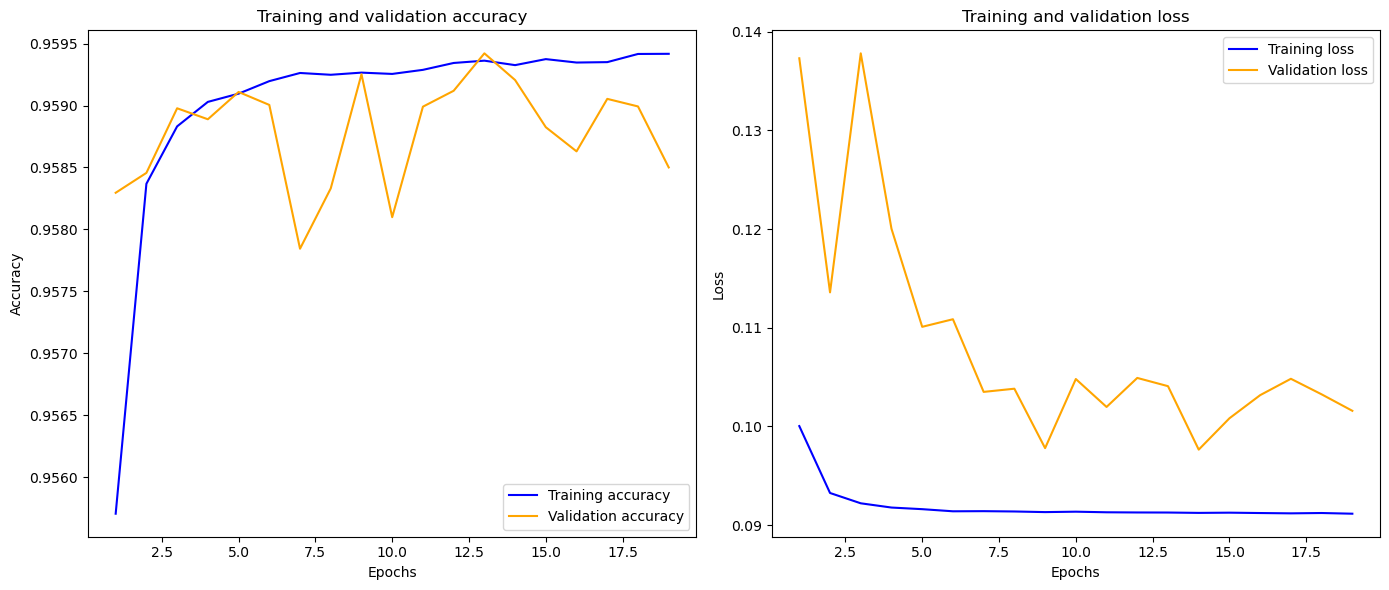

In [3]:
# Accuracy and loss plots:

history_dict = history.history
accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

# Determining the number of epochs based on the length of the accuracy list:
epochs = range(1, len(accuracy) + 1)

# Plotting the training and validation accuracy:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, "b-", label="Training accuracy")
plt.plot(epochs, val_accuracy, "orange", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plotting the training and validation loss:
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "b-", label="Training loss")
plt.plot(epochs, val_loss, "orange", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Adjusting layout:
plt.tight_layout()

# Saving plots as a PNG file:
plt.savefig("training_validation_plot_final_2.png")

# Displaying the plots:
plt.show()